# K-Shape Experiments

In [1]:
from kshape.core import kshape
from kshape.core import KShapeClusteringCPU
import os
import csv
import time
import numpy as np
from sklearn.metrics import rand_score, normalized_mutual_info_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Useful Functions

In [2]:
class ClusterDataLoader:
    def __init__(self, dataset_path):
        self.path = dataset_path

    def load(self, sub_dataset_name):
        ts, labels = [], []
        for mode in ['_TRAIN']:
            with open(os.path.join(self.path,sub_dataset_name + mode)) as csv_file: #sub_dataset_name, sub_dataset_name + mode)) as csv_file:
                lines = csv.reader(csv_file, delimiter=',')
                for line in lines:
                    ts.append([float(x) for x in line[1:]])
                    labels.append(int(line[0])-1)

        if min(labels) == 1:
            labels = labels - 1
        if min(labels) == -1:
            labels = labels + 1

        return np.array(ts), np.array(labels), int(len(set(labels)))

In [3]:
def apply_kshape(dataset_name):
    DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
    DATASET_NAME = dataset_name
    dataloder = ClusterDataLoader(DATASET_PATH)
    ts, labels, num_clusters = dataloder.load(DATASET_NAME)
    # ts.shape
    start_time = time.time()
    ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
    ksc.fit(np.expand_dims(ts, axis=2))
    
    return time.time() - start_time 

In [4]:
def line_plot(x,y,title,xlabel,ylabel,figsize=(10,6)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(x,y,marker='X')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [5]:
def apply_kmeans(dataset_name):
    DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
    DATASET_NAME = dataset_name
    dataloder = ClusterDataLoader(DATASET_PATH)
    ts, labels, num_clusters = dataloder.load(DATASET_NAME)
    kmeans = KMeans(init="random",n_clusters=num_clusters,n_init=5,max_iter=100,random_state=42)
    #kmeans = KMeans(init="k-means++",n_clusters=num_clusters,n_init=5,max_iter=100,random_state=42)
    start_time = time.time()
    kmeans.fit(ts)
    return time.time() - start_time

In [6]:
def kshape_accuracy(dataset_name):
    DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
    DATASET_NAME = dataset_name
    dataloder = ClusterDataLoader(DATASET_PATH)
    ts, labels, num_clusters = dataloder.load(DATASET_NAME)
    ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
    ksc.fit(np.expand_dims(ts, axis=2))
    predictions = ksc.labels_
    return rand_score(labels, predictions)

In [7]:
def kmeans_accuracy(dataset_name):
    DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
    DATASET_NAME = dataset_name
    dataloder = ClusterDataLoader(DATASET_PATH)
    ts, labels, num_clusters = dataloder.load(DATASET_NAME)
    kmeans = KMeans(init="random",n_clusters=num_clusters,n_init=5,max_iter=100,random_state=42)
    kmeans.fit(ts)
    predictions = kmeans.labels_
    return rand_score(labels,predictions)

In [8]:
def double_line_plot(x,y,y1,title,xlabel,ylabel,data_labels,figsize=(10,6)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(x,y,marker='X',label=data_labels[0])
    plt.plot(x,y1,marker='X',label=data_labels[1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

In [9]:
def line_plot_wmean(x,y,y1,title,xlabel,ylabel,data_labels,figsize=(10,6)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(x,y,marker='X',label=data_labels[0])
    plt.plot(x,y1,marker='X',label=data_labels[1])
    plt.axhline(y=np.nanmean(y), color = 'r',linestyle = '--', linewidth = 2, label="K-Shape Mean Accurary")
    plt.axhline(y=np.nanmean(y1), color = 'g',linestyle = '--', linewidth = 2, label="K-Means Mean Accurary")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

In [ ]:
def four_line_plot(x,y,title,xlabel,ylabel,data_labels,figsize=(10,6)):
    plt.figure(figsize=figsize)
    plt.title(title)
    for i in range(len(y)):
        plt.plot(x,y[i],marker='X',label=data_labels[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

## Experiment 1 - Iterations = 1

In [10]:
dataset_lists = [ 'OliveOil', 'Trace', 'Car', 'TwoPatterns']
x_plt = []
y_plt = []

for dataset in dataset_lists:
    x_plt.append(dataset)
    cpu_time = apply_kshape(dataset)
    y_plt.append(cpu_time)
    #print(f'Cpu Time for Dataset {dataset} is {cpu_time} seconds')

In [11]:
y_plt

[1.0980291366577148,
 1.1645183563232422,
 5.0027360916137695,
 15.870213747024536]

In [12]:
x_plt

['OliveOil', 'Trace', 'Car', 'TwoPatterns']

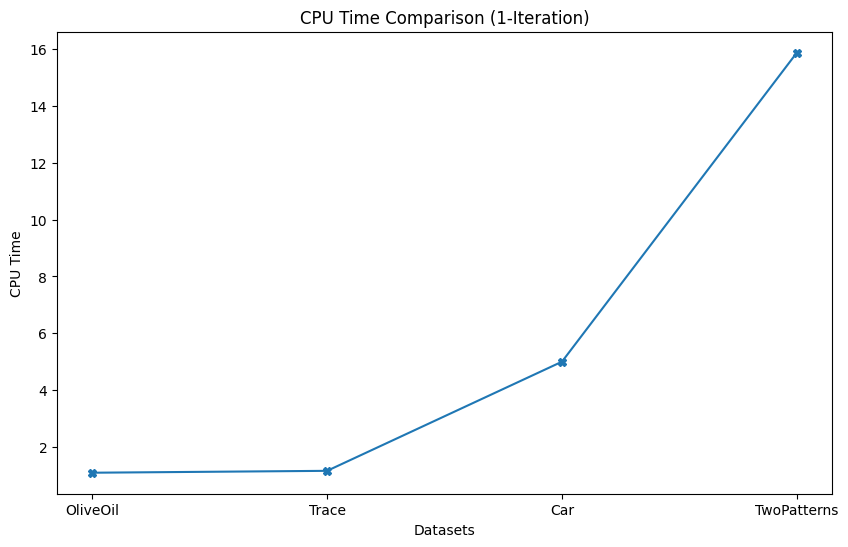

In [13]:
line_plot(x_plt,y_plt,'CPU Time Comparison (1-Iteration)','Datasets','CPU Time')

## Experiment 2

In [14]:
dataset_lists = [ 'OliveOil', 'Trace', 'Car', 'TwoPatterns']
x_plt = []
y_plt = []
iteration_number = 5

for dataset in dataset_lists:
    x_plt.append(dataset)
    cpu_times = []
    for i in range(iteration_number):
        cpu_time = apply_kshape(dataset)
        cpu_times.append(cpu_time)
        print(f'Cpu Time for Dataset {dataset} in Iteration {i} is {cpu_time} seconds')
    y_plt.append(np.mean(cpu_times))

Cpu Time for Dataset OliveOil in Iteration 0 is 3.9163453578948975 seconds
Cpu Time for Dataset OliveOil in Iteration 1 is 2.459137201309204 seconds
Cpu Time for Dataset OliveOil in Iteration 2 is 1.6795859336853027 seconds
Cpu Time for Dataset OliveOil in Iteration 3 is 2.766906976699829 seconds
Cpu Time for Dataset OliveOil in Iteration 4 is 1.4926128387451172 seconds
Cpu Time for Dataset Trace in Iteration 0 is 0.5675108432769775 seconds
Cpu Time for Dataset Trace in Iteration 1 is 1.0839228630065918 seconds
Cpu Time for Dataset Trace in Iteration 2 is 1.8565747737884521 seconds
Cpu Time for Dataset Trace in Iteration 3 is 0.7565369606018066 seconds
Cpu Time for Dataset Trace in Iteration 4 is 0.7426877021789551 seconds
Cpu Time for Dataset Car in Iteration 0 is 2.6130871772766113 seconds
Cpu Time for Dataset Car in Iteration 1 is 2.46382737159729 seconds
Cpu Time for Dataset Car in Iteration 2 is 4.257037162780762 seconds
Cpu Time for Dataset Car in Iteration 3 is 8.919407606124878

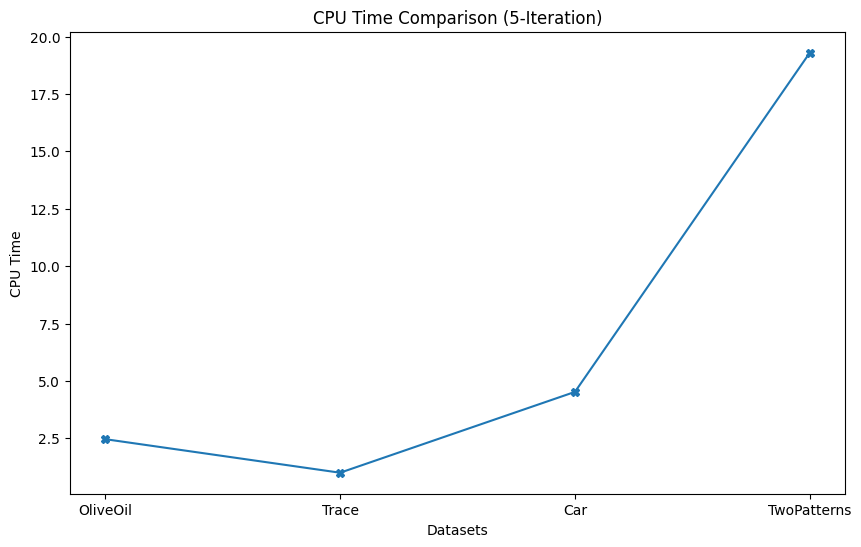

In [15]:
line_plot(x_plt,y_plt,'CPU Time Comparison (5-Iteration)','Datasets','CPU Time')

## K-Means

In [16]:
dataset_lists = [ 'OliveOil', 'Trace', 'Car', 'TwoPatterns']
x_plt = []
y_plt_k = []

for dataset in dataset_lists:
    x_plt.append(dataset)
    cpu_time = apply_kmeans(dataset)
    print(f'Kmeans Cpu Time for Dataset {dataset} is {cpu_time} seconds')
    y_plt_k.append(cpu_time)

Kmeans Cpu Time for Dataset OliveOil is 0.18343853950500488 seconds
Kmeans Cpu Time for Dataset Trace is 0.10892415046691895 seconds
Kmeans Cpu Time for Dataset Car is 0.02684473991394043 seconds
Kmeans Cpu Time for Dataset TwoPatterns is 0.13422846794128418 seconds


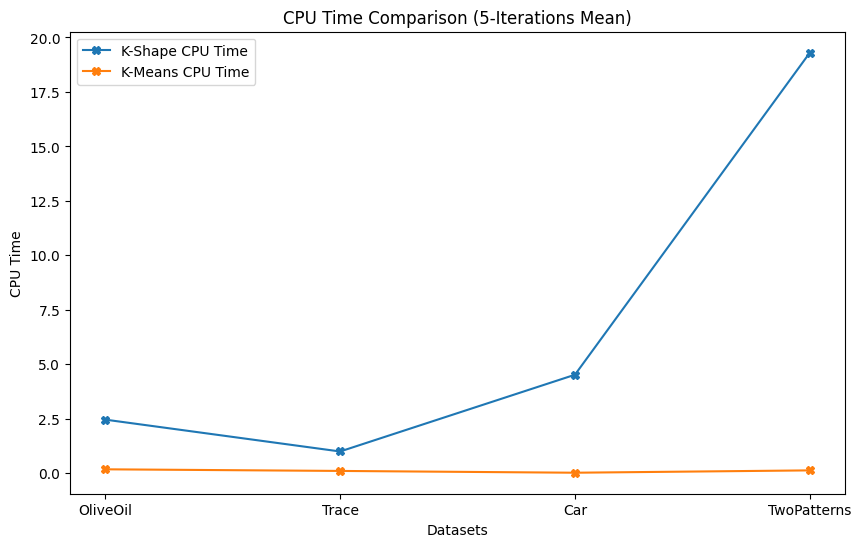

In [17]:
double_line_plot(x_plt,y_plt,y_plt_k,'CPU Time Comparison (5-Iterations Mean)','Datasets','CPU Time',['K-Shape CPU Time','K-Means CPU Time'])

## Accuracy


In [18]:
dataset_lists = [ 'OliveOil', 'Trace', 'Car', 'TwoPatterns']
x_plt = []
y_plt = []
iteration_number = 5

for dataset in dataset_lists:
    x_plt.append(dataset)
    accuracies = []
    for i in range(iteration_number):
        accuracy = kshape_accuracy(dataset)
        print(f'K-Shape Accuracy for Dataset {dataset} in Iteration {i} is {accuracy}')
        accuracies.append(accuracy)
    y_plt.append(np.mean(accuracies))

K-Shape Accuracy for Dataset OliveOil in Iteration 0 is 0.8114942528735632
K-Shape Accuracy for Dataset OliveOil in Iteration 1 is 0.8160919540229885
K-Shape Accuracy for Dataset OliveOil in Iteration 2 is 0.8114942528735632
K-Shape Accuracy for Dataset OliveOil in Iteration 3 is 0.8160919540229885
K-Shape Accuracy for Dataset OliveOil in Iteration 4 is 0.7563218390804598
K-Shape Accuracy for Dataset Trace in Iteration 0 is 0.7490909090909091
K-Shape Accuracy for Dataset Trace in Iteration 1 is 0.7519191919191919
K-Shape Accuracy for Dataset Trace in Iteration 2 is 0.8622222222222222
K-Shape Accuracy for Dataset Trace in Iteration 3 is 0.7567676767676768
K-Shape Accuracy for Dataset Trace in Iteration 4 is 0.7591919191919192
K-Shape Accuracy for Dataset Car in Iteration 0 is 0.6305084745762712
K-Shape Accuracy for Dataset Car in Iteration 1 is 0.6480225988700565
K-Shape Accuracy for Dataset Car in Iteration 2 is 0.632768361581921
K-Shape Accuracy for Dataset Car in Iteration 3 is 0.666

In [19]:
np.mean(y_plt)

np.float64(0.7265690365515615)

In [20]:
y_plt

[np.float64(0.8022988505747127),
 np.float64(0.7758383838383839),
 np.float64(0.6510734463276836),
 np.float64(0.6770654654654655)]

In [21]:
dataset_lists = [ 'OliveOil', 'Trace', 'Car', 'TwoPatterns']
x_plt = []
y_plt_k = []

for dataset in dataset_lists:
    x_plt.append(dataset)
    accuracy = kmeans_accuracy(dataset)
    print(f'K-Means Accuracy for Dataset {dataset} is {accuracy}')
    y_plt_k.append(accuracy)

K-Means Accuracy for Dataset OliveOil is 0.8528735632183908
K-Means Accuracy for Dataset Trace is 0.7519191919191919
K-Means Accuracy for Dataset Car is 0.672316384180791
K-Means Accuracy for Dataset TwoPatterns is 0.6289089089089089


In [22]:
np.mean(y_plt_k)

np.float64(0.7265045120568207)

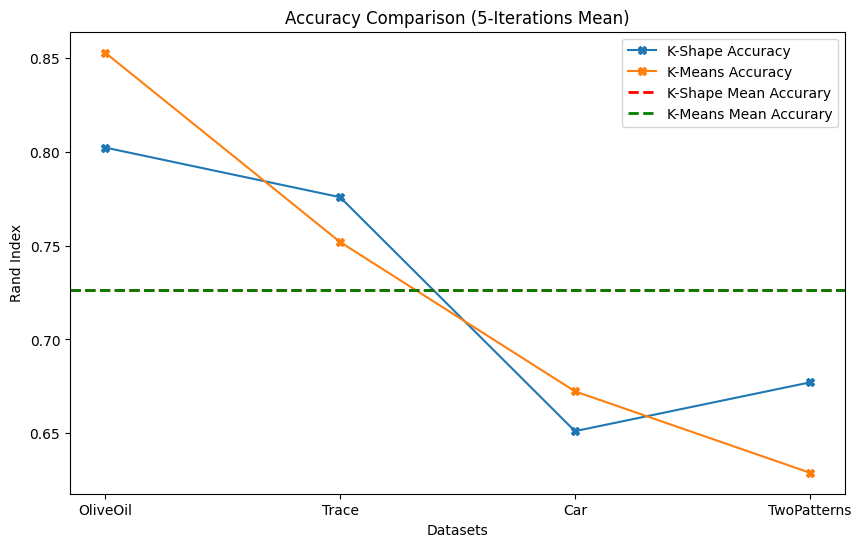

In [23]:
line_plot_wmean(x_plt,y_plt,y_plt_k,'Accuracy Comparison (5-Iterations Mean)','Datasets','Rand Index',['K-Shape Accuracy','K-Means Accuracy'])

## Custom Analysis

### Experiment 1

On time-series (rows), no key findings were extracted

In [24]:
DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
DATASET_NAME = 'TwoPatterns'
dataloder = ClusterDataLoader(DATASET_PATH)
ts, labels, num_clusters = dataloder.load(DATASET_NAME)
iteration_number = 5
x_plt = []
y_plt = []
limits = [0.25,0.5,0.75,1]
for limit in limits:
    last_row_index = int(ts.shape[0]*limit)
    limited_ts = ts[:last_row_index,:]
    #print(new_ts.shape)
    cpu_times = []
    for i in range(iteration_number):
        start_time = time.time()
        ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
        ksc.fit(np.expand_dims(limited_ts, axis=2))
        cpu_time = time.time() - start_time 
        print(f'K-Shape CPU Time for Dataset {dataset} with {(limit*100)}% of time-series is {cpu_time} seconds (Iteration {i})')
        cpu_times.append(cpu_time)
    y_plt.append(np.mean(cpu_times))

K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 2.209995746612549 seconds (Iteration 0)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 1.5033388137817383 seconds (Iteration 1)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 2.2973804473876953 seconds (Iteration 2)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 2.1434271335601807 seconds (Iteration 3)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 1.7067914009094238 seconds (Iteration 4)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 4.967270374298096 seconds (Iteration 0)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 3.276866912841797 seconds (Iteration 1)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 7.548205137252808 seconds (Iteration 2)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 4.981908082962036 seconds (Iteration 3)
K-Shap

### Experiment 1.1

In [25]:
DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
DATASET_NAME = 'TwoPatterns'
dataloder = ClusterDataLoader(DATASET_PATH)
ts, labels, num_clusters = dataloder.load(DATASET_NAME)
iteration_number = 5
x_plt = []
y_plt_c = []
limits = [0.25,0.5,0.75,1]
for limit in limits:
    last_column_index = round(ts.shape[1]*limit)
    limited_ts = ts[:,:last_column_index]
    print(limited_ts.shape)
    cpu_times = []
    for i in range(iteration_number):
        start_time = time.time()
        ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
        ksc.fit(np.expand_dims(limited_ts, axis=2))
        cpu_time = time.time() - start_time 
        print(f'K-Shape CPU Time for Dataset {dataset} with {(limit*100)}% of time-instants is {cpu_time} seconds (Iteration {i})')
        cpu_times.append(cpu_time)
    y_plt_c.append(np.mean(cpu_times))
    

(1000, 32)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-instants is 16.883352041244507 seconds (Iteration 0)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-instants is 16.71034574508667 seconds (Iteration 1)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-instants is 19.752009868621826 seconds (Iteration 2)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-instants is 8.318882703781128 seconds (Iteration 3)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-instants is 29.8221492767334 seconds (Iteration 4)
(1000, 64)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-instants is 7.06640887260437 seconds (Iteration 0)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-instants is 9.129287719726562 seconds (Iteration 1)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-instants is 8.670603513717651 seconds (Iteration 2)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-instants is 12.1919870

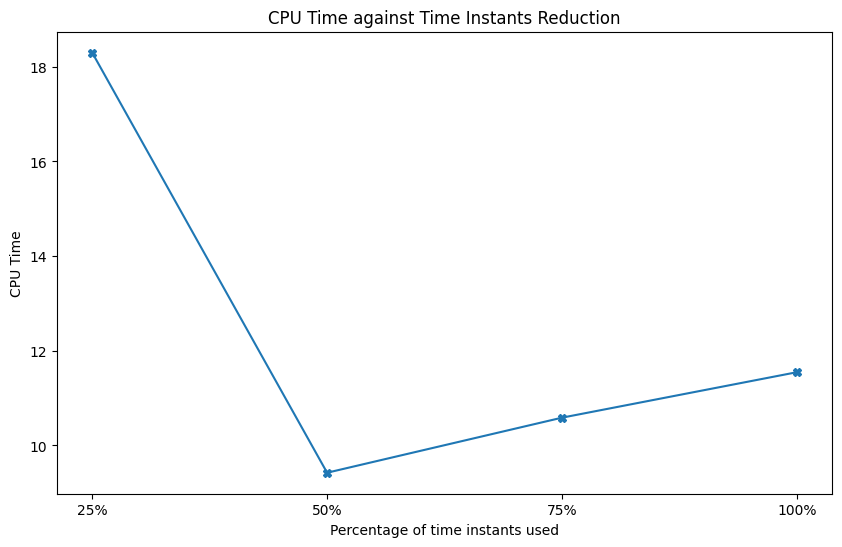

In [30]:
x_plt = ['25%','50%','75%','100%']
line_plot(x_plt,y_plt_c,'CPU Time against Time Instants Reduction','Percentage of time instants used','CPU Time')

### Experiment 1.2

In [32]:
DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
DATASET_NAME = 'TwoPatterns'
dataloder = ClusterDataLoader(DATASET_PATH)
ts, labels, num_clusters = dataloder.load(DATASET_NAME)
max_iterations = [25,50,75,100]
iteration_number = 5
x_plt = ['25%','50%','75%','100%']
y_plt_iterations = []
limits = [0.25,0.5,0.75,1]
for max_iter in max_iterations:
    print(f"Max Iteration Number: {max_iter}")
    y_plt_limits = []
    for limit in limits:
        last_column_index = round(ts.shape[1]*limit)
        limited_ts = ts[:,:last_column_index]
        print(limited_ts.shape)
        cpu_times = []
        for i in range(iteration_number):
            start_time = time.time()
            ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=max_iter,n_jobs=-1)
            ksc.fit(np.expand_dims(limited_ts, axis=2))
            cpu_time = time.time() - start_time 
            print(f'K-Shape CPU Time for Dataset {dataset} with {(limit*100)}% of time-series is {cpu_time} seconds (Iteration {i})')
            cpu_times.append(cpu_time)
        y_plt_limits.append(np.mean(cpu_times))
    y_plt_iterations.append(y_plt_limits)
    print("-----------------------------------\n")

Max Iteration Number: 25
(1000, 32)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 20.53670859336853 seconds (Iteration 0)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 19.50898551940918 seconds (Iteration 1)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 19.753082513809204 seconds (Iteration 2)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 19.00275945663452 seconds (Iteration 3)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 16.860865831375122 seconds (Iteration 4)
(1000, 64)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 8.103317022323608 seconds (Iteration 0)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 14.753214836120605 seconds (Iteration 1)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 10.897956848144531 seconds (Iteration 2)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is

KeyboardInterrupt: 

In [ ]:
four_line_plot(x_plt,y_plt_iterations,'CPU Time against Time Instants Reduction','Percentage of time instants used','CPU Time', ['Max Iteration = 25', 'Max Iteration = 50','Max Iteration = 75','Max Iteration = 100' ])

### Experiment 1.3

In [28]:
DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
DATASET_NAME = 'TwoPatterns'
dataloder = ClusterDataLoader(DATASET_PATH)
ts, labels, num_clusters = dataloder.load(DATASET_NAME)
iteration_number = 5
x_plt = []
y_plt_ma = []
limits = [0.25,0.5,0.75,1]
for limit in limits:
    last_column_index = round(ts.shape[1]*limit)
    limited_ts = ts[:,:last_column_index]
    print(limited_ts.shape)
    accuracies = []
    for i in range(iteration_number):
        ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
        ksc.fit(np.expand_dims(limited_ts, axis=2))
        predictions = ksc.labels_
        accuracy = rand_score(labels,predictions)
        print(f'K-Shape Accuracy for Dataset {dataset} with {(limit*100)}% of time-instants is {accuracy} (Iteration {i})')
        accuracies.append(accuracy)
    y_plt_ma.append(np.mean(accuracies))

(1000, 32)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6282242242242242 (Iteration 0)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6302402402402403 (Iteration 1)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.629045045045045 (Iteration 2)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6302062062062062 (Iteration 3)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6324004004004004 (Iteration 4)
(1000, 64)
K-Shape Accuracy for Dataset TwoPatterns with 50.0% of time-instants is 0.6987347347347347 (Iteration 0)
K-Shape Accuracy for Dataset TwoPatterns with 50.0% of time-instants is 0.690976976976977 (Iteration 1)
K-Shape Accuracy for Dataset TwoPatterns with 50.0% of time-instants is 0.6725585585585585 (Iteration 2)
K-Shape Accuracy for Dataset TwoPatterns with 50.0% of time-instants is 0.6935055055055055 (Iteration 3)
K-Shape Accuracy for Dataset TwoPat

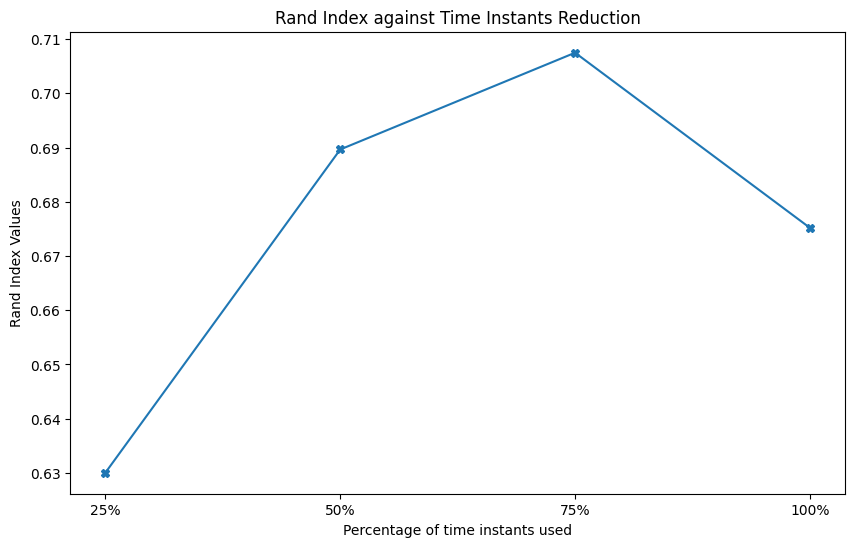

In [31]:
x_plt = ['25%','50%','75%','100%']
line_plot(x_plt,y_plt_ma,'Rand Index against Time Instants Reduction','Percentage of time instants used','Rand Index Values')

### Experiment 1.4

In [ ]:
DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
DATASET_NAME = 'TwoPatterns'
dataloder = ClusterDataLoader(DATASET_PATH)
ts, labels, num_clusters = dataloder.load(DATASET_NAME)
max_iterations = [25,50,75,100]
iteration_number = 5
x_plt = ['25%','50%','75%','100%']
y_plt_iterations = []
limits = [0.25,0.5,0.75,1]
for max_iter in max_iterations:
    print(f"Max Iteration Number: {max_iter}")
    y_plt_limits = []
    for limit in limits:
        last_column_index = round(ts.shape[1]*limit)
        limited_ts = ts[:,:last_column_index]
        print(limited_ts.shape)
        accuracies = []
        for i in range(iteration_number):
            ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
            ksc.fit(np.expand_dims(limited_ts, axis=2))
            predictions = ksc.labels_
            accuracy = rand_score(labels,predictions)
            print(f'K-Shape Accuracy for Dataset {dataset} with {(limit*100)}% of time-instants is {accuracy} (Iteration {i})')
            accuracies.append(accuracy)
        y_plt_limits.append(np.mean(accuracies))
    y_plt_iterations.append(y_plt_limits)
    print("-----------------------------------\n")

(1000, 32)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6314414414414414 (Iteration 0)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 37.0734007358551 seconds (Iteration 0)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6292832832832833 (Iteration 1)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 35.66105103492737 seconds (Iteration 1)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6329489489489489 (Iteration 2)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 16.310688257217407 seconds (Iteration 2)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6294774774774775 (Iteration 3)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 35.503283977508545 seconds (Iteration 3)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6304904904904904 (Iteration 4)
K-Shape CPU Time for Da

In [ ]:
four_line_plot(x_plt,y_plt_iterations,'Rand Index against Time Instants Reduction','Percentage of time instants used','CPU Time', ['Max Iteration = 25', 'Max Iteration = 50','Max Iteration = 75','Max Iteration = 100' ])